In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE= 256
# IMAGE_SIZE2= 172
BATCH_SIZE=32
CHANNELS =3
EPOCHS =50

In [3]:
 dataset =tf.keras.preprocessing.image_dataset_from_directory("FACE",
                                                   shuffle=True,
                                                   image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                  batch_size = BATCH_SIZE)

Found 400 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names 
class_names

['MAN', 'WOMAN']

In [5]:
len(dataset)

13

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0]


In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[241.      232.      227.     ]
  [241.      232.      227.     ]
  [241.      232.      227.     ]
  ...
  [198.23438 186.75781 172.85156]
  [202.14062 191.05469 178.71094]
  [203.      192.      180.     ]]

 [[241.      232.      227.     ]
  [241.      232.      227.     ]
  [241.      232.      227.     ]
  ...
  [198.14441 186.66785 172.80255]
  [201.98352 190.89758 178.56122]
  [202.82812 191.82812 179.82812]]

 [[241.      232.      227.     ]
  [241.      232.      227.     ]
  [241.      232.      227.     ]
  ...
  [197.73547 186.25891 172.57977]
  [201.26941 190.18347 177.88068]
  [202.04688 191.04688 179.04688]]

 ...

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [245.77289 240.77289 237.77289]
  [246.34967 241.34967 238.34967]
  [246.47656 241.47656 238.47656]]

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [245.56842 240.56842 237.56842]
  [2

In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


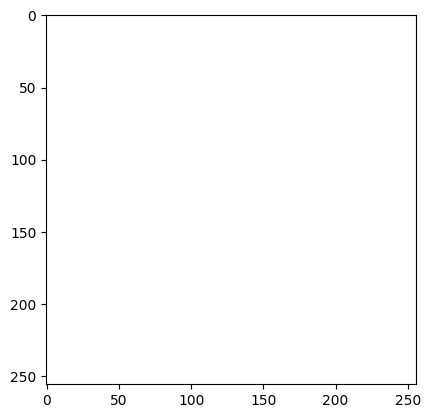

In [9]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())

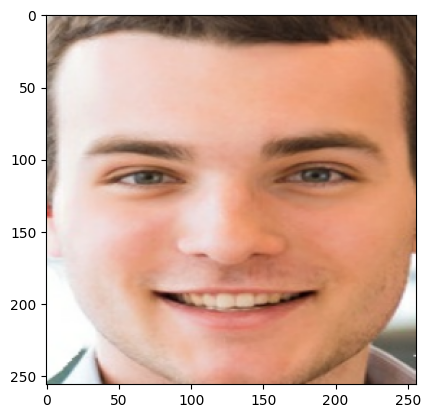

In [10]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

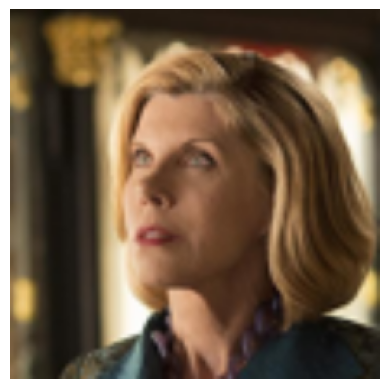

In [11]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    # it shuffles image everytime we run 

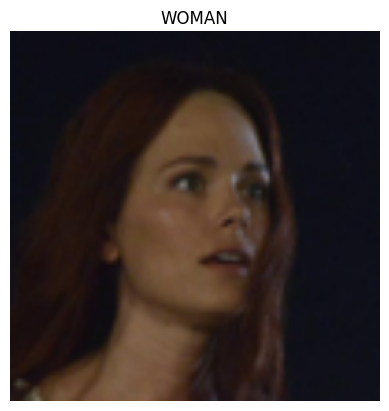

In [12]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    # it shuffles image everytime we run 

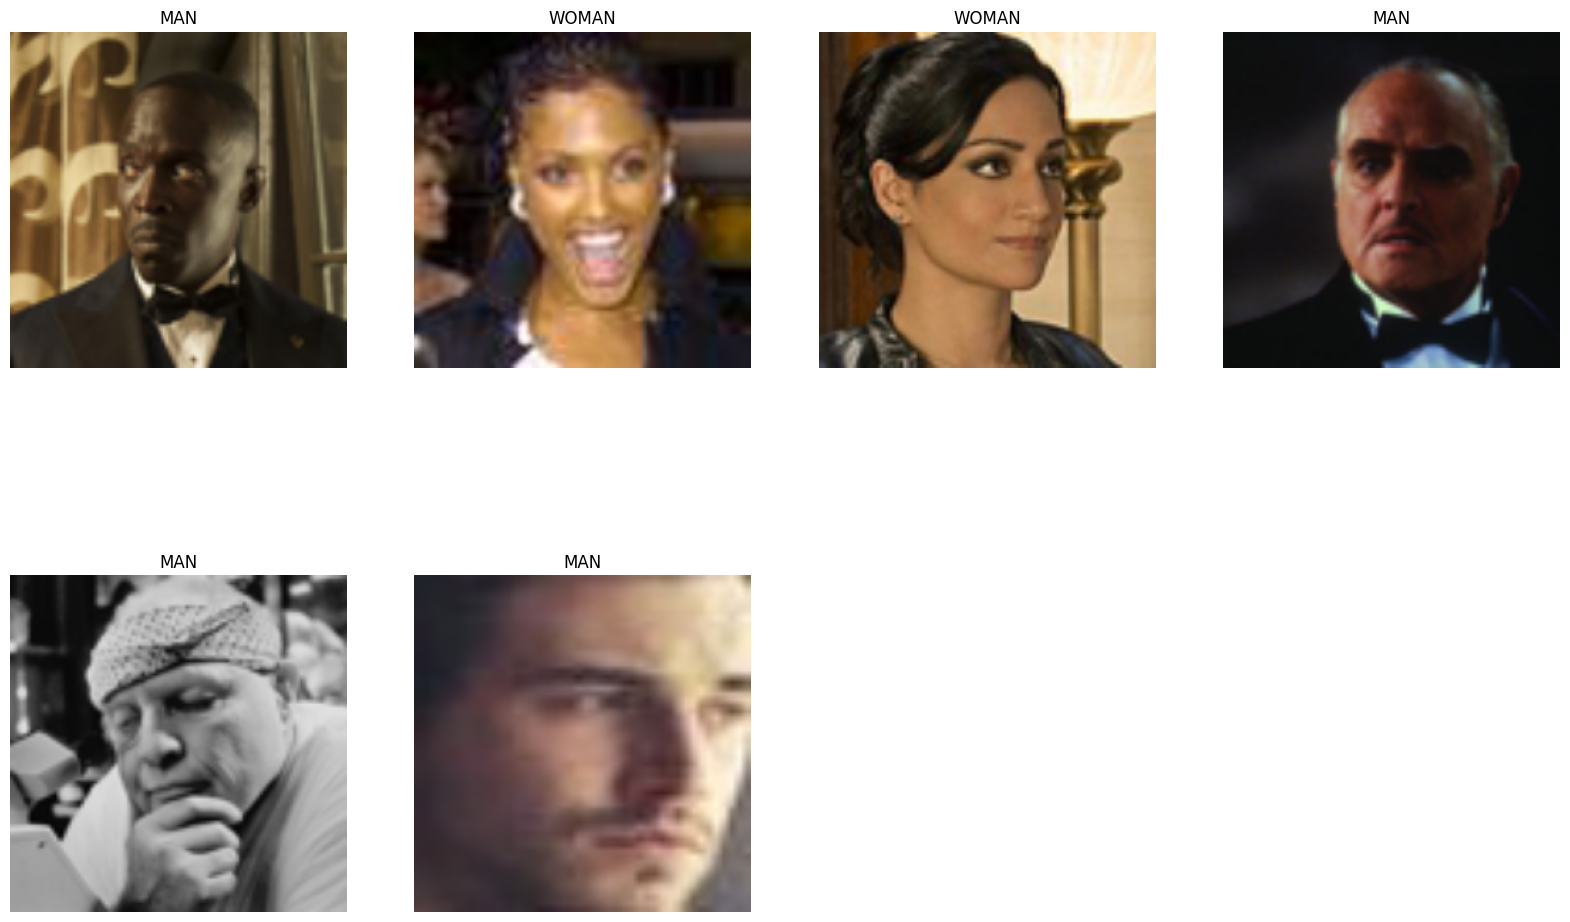

In [13]:
# for displaying i number of images in for loop 
plt.figure(figsize=(20,20))
for image_batch,label_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        # it shuffles image everytime we run 

In [14]:
# each element is 16 batch 
#dividing dataset into training testing data 
# 80% ==>training data 
# 20% ==> 10% ==> validation ,10% ==> test 
# since we do not have train_test_split in tf

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split =0.1,shuffle = True,shuffle_size=10000):
    ds_size =len(ds)
    if shuffle :
        ds=ds.shuffle(shuffle_size,seed =12)
    
    
    train_size = int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    
    train_ds=dataset.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    
    return train_ds,val_ds,test_ds


In [16]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
 resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [19]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),])

In [20]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=2
model = models.Sequential ([ resize_and_rescale,
                              data_augmentation,
                              layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Flatten(),
                              layers.Dense(64,activation='relu'),
                              layers.Dense(n_classes,activation='softmax'),
                           
                           
                          ])
model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history =model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
10/10 [==============================] - 26s 2s/step - loss: 0.6837 - accuracy: 0.5281 - val_loss: 0.6681 - val_accuracy: 0.5312
Epoch 2/50
10/10 [==============================] - 18s 2s/step - loss: 0.6463 - accuracy: 0.6812 - val_loss: 0.6645 - val_accuracy: 0.4688
Epoch 3/50
10/10 [==============================] - 21s 2s/step - loss: 0.6162 - accuracy: 0.6562 - val_loss: 0.5222 - val_accuracy: 0.7812
Epoch 4/50
10/10 [==============================] - 16s 2s/step - loss: 0.5405 - accuracy: 0.7812 - val_loss: 0.4931 - val_accuracy: 0.7812
Epoch 5/50
10/10 [==============================] - 17s 2s/step - loss: 0.5192 - accuracy: 0.7969 - val_loss: 0.4319 - val_accuracy: 0.8438
Epoch 6/50
10/10 [==============================] - 17s 2s/step - loss: 0.4470 - accuracy: 0.8062 - val_loss: 0.3724 - val_accuracy: 0.8125
Epoch 7/50
10/10 [==============================] - 17s 2s/step - loss: 0.4517 - accuracy: 0.8313 - val_loss: 0.4551 - val_accuracy: 0.8125
Epoch 8/50
10/10 [==

In [24]:
scores=model.evaluate(test_ds)

2/2 [==============================] - 2s 472ms/step - loss: 0.3188 - accuracy: 0.8594


In [25]:
scores

[0.31878194212913513, 0.859375]

In [26]:
history

In [27]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 10}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
history.history['accuracy']

[0.528124988079071,
 0.6812499761581421,
 0.65625,
 0.78125,
 0.796875,
 0.8062499761581421,
 0.831250011920929,
 0.815625011920929,
 0.800000011920929,
 0.7906249761581421,
 0.809374988079071,
 0.8218749761581421,
 0.831250011920929,
 0.8374999761581421,
 0.828125,
 0.809374988079071,
 0.8374999761581421,
 0.824999988079071,
 0.824999988079071,
 0.8374999761581421,
 0.8656250238418579,
 0.8187500238418579,
 0.8374999761581421,
 0.824999988079071,
 0.828125,
 0.840624988079071,
 0.856249988079071,
 0.831250011920929,
 0.8656250238418579,
 0.8687499761581421,
 0.8500000238418579,
 0.856249988079071,
 0.859375,
 0.862500011920929,
 0.8531249761581421,
 0.8656250238418579,
 0.8687499761581421,
 0.856249988079071,
 0.875,
 0.8687499761581421,
 0.84375,
 0.8812500238418579,
 0.8500000238418579,
 0.84375,
 0.8531249761581421,
 0.8687499761581421,
 0.8687499761581421,
 0.8531249761581421,
 0.8500000238418579,
 0.8656250238418579]

In [30]:
len(history.history['accuracy'])

50

In [31]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']


loss = history.history['loss']
val_loss =history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

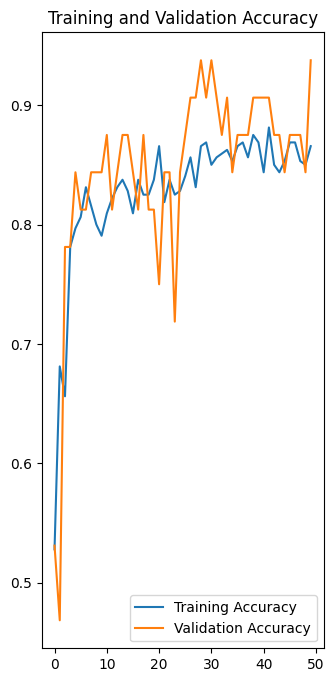

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

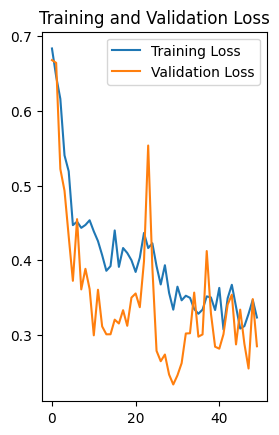

In [33]:
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

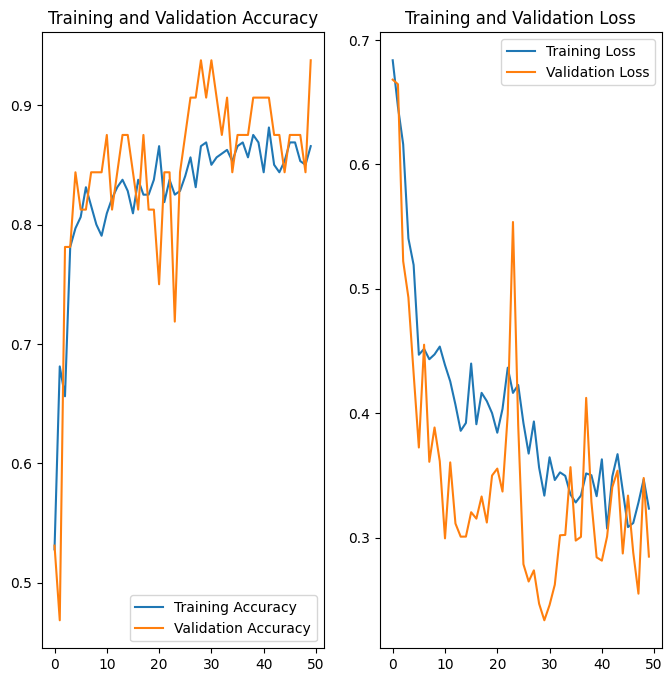

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict 
first image's actual label: WOMAN
1/1 [==============================] - 1s 785ms/step
[0.01520268 0.9847973 ]
predicted label : WOMAN


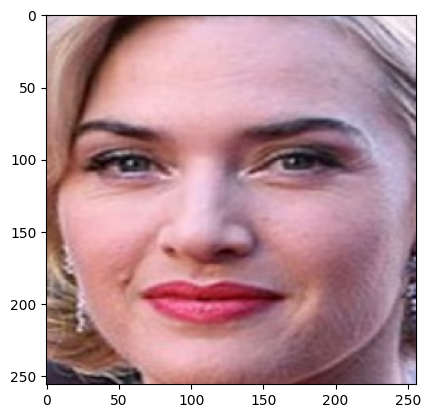

In [35]:
for image_batch,label_batch in dataset.take(1):
    first_image=(image_batch[0].numpy().astype("uint8"))
    first_label=label_batch[0].numpy()
    
    print("first image to predict ")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0])
    print("predicted label :",class_names[np.argmax(batch_prediction[0])])

In [36]:
np.argmax([3.2332787e-01 ,6.7614532e-01, 5.2684796e-04])

1

In [37]:
def predict(model,img):
    img_array= tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array= tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 46ms/step


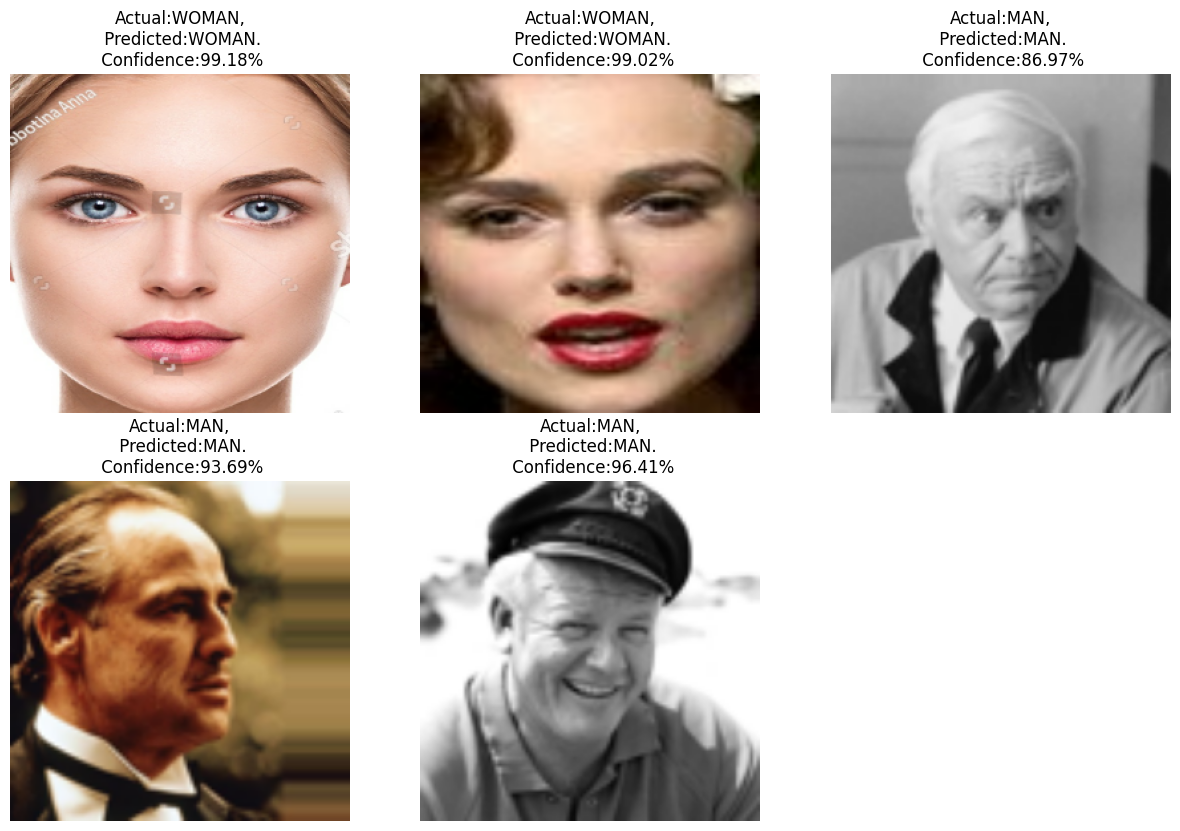

In [38]:
plt.figure(figsize=(15,15))
for image,labels in test_ds.take(1):
    for i in range (5):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,image[i].numpy())
        
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")

In [39]:
import os
model_version=1
model.save("face_recognition_model")

INFO:tensorflow:Assets written to: face_recognition_model\assets


INFO:tensorflow:Assets written to: face_recognition_model\assets


In [40]:
import os
model_version = max([int(i) for i in (os.listdir("./model_versions")+[0])])+1
model.save(f"./model_versions/{model_version}")

INFO:tensorflow:Assets written to: ./model_versions/3\assets


INFO:tensorflow:Assets written to: ./model_versions/3\assets


In [41]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")

In [42]:
tflite_model = converter.convert()

In [43]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)